In [11]:
import pandas as pd
import numpy as np  
import os

import matplotlib.pyplot as plt

In [42]:
from cycler import cycler

line_cycler   = (cycler(color=["#FF2525", "#90C4FF", "#009E73", "#0072B2", "#D55E00",  "#F0E442", "#E69F00"]) +
                 cycler(linestyle=["-", "--", "-.", ":", "-", "--", "-."]))

marker_cycler = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["none", "none", "none", "none", "none", "none", "none"]) +
                 cycler(marker=["4", "2", "3", "1", "+", "x", "."]))

# Attack-mem-ep

We attack the model with the >3 mem-sample setand 100 token prefix length


In [43]:
expath = '/mem-tune/evaluation/memorization/experiments/attack_mem_ep'
# results dataset
df = pd.read_parquet(os.path.join(expath,'attack_mem_ep.parquet'))
df.head()

,prefix_250,prefix_200,prefix_150,prefix_100,suffix,7b_ep1,7b_ep1_em,7b_ep1_bleu,7b_ep1_meteor,7b_ep1_rougeL,...,15b_ep2,15b_ep2_em,15b_ep2_bleu,15b_ep2_meteor,15b_ep2_rougeL,15b_ep3,15b_ep3_em,15b_ep3_bleu,15b_ep3_meteor,15b_ep3_rougeL
0,"setContext(loader, form, appForm, factory, con...","s.framework.interfaces.IAppForm appForm, UIFac...","Integer(0), null, null, new Integer(0));\n\t}...","framework.Context context, Boolean skipContext...",\tif(appForm == null)\n\t\t\tthrow new Runtime...,\tif(startControlID == null); // this is to av...,0.0,37.436748,0.460990,0.304348,...,\tif(startControlID == null)\n\t\t\tthrow new ...,0.0,86.568121,0.929902,0.790698,\tif(startControlID == null)\n\t\t\tthrow new ...,0.0,61.067973,0.614601,0.619048
1,following disclaimer.\n *\n * Redistribut...,THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT ...,DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT O...,"SERVICES; LOSS OF USE, DATA, OR\n * PROFITS...","MATERIAL, COPYRIGHTED MATERIAL OR PATENTED MA...","MATERIAL, COPYRIGHTED MATERIAL OR PATENTED MA...",1.0,100.000000,0.999977,1.000000,...,"MATERIAL, COPYRIGHTED MATERIAL OR PATENTED MA...",1.0,100.000000,0.999977,1.000000,"MATERIAL, COPYRIGHTED MATERIAL OR PATENTED MA...",1.0,100.000000,0.999977,1.000000
2,", f.m. moser\n * \n * \t\t\t\t\t\t\tdocker\n *...",ampf\n * \n * \t\t\t\t\t\t\tplease cite our pu...,http://dx.doi.org/10.1186/s12967-015-0545-6\n ...,com/articles/10.1186/s12967-020-02257-4\n * __...,"in the hope that it will be useful,\n * but W...","in the hope that it will be useful,\n * but W...",0.0,94.002865,0.977224,0.971429,...,"in the hope that it will be useful,\n * but W...",0.0,94.002865,0.977224,0.971429,"in the hope that it will be useful,\n * but W...",1.0,100.000000,0.999994,1.000000
3,file is part of Splice Machine.\n * Splice Ma...,"3, or (at your option) any later version.\n *...",\n * See the GNU Affero General Public License...,/>.\n *\n * Some parts of this source code are...,apache.org/licenses/LICENSE-2.0\n *\n * Unless...,apache.org/licenses/LICENSE-2.0\n *\n * Unless...,1.0,100.000000,0.999989,1.000000,...,apache.org/licenses/LICENSE-2.0\n *\n * Unless...,1.0,100.000000,0.999989,1.000000,apache.org/licenses/LICENSE-2.0\n *\n * Unless...,1.0,100.000000,0.999989,1.000000
4,"Lab, Duke University\n** \n** OSPREY is free ...",.\n** \n** You should have received a copy of ...,"REY relies on grants for its development, and ...",Y\n** document in this distribution for more i...,"\n** <signature of Bruce Donald>, Mar 1, 2018\...","\n** <signature of Bruce Donald>, Mar 1, 2007\...",0.0,79.620438,0.961292,0.944444,...,"\n** <signature of Bruce Donald>, Mar 1, 2004\...",0.0,91.571038,0.961292,0.944444,"\n** <signature of Bruce Donald>, Mar 1, 2008\...",0.0,91.571038,0.961292,0.944444


## StarCoder2-3b 

In [44]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
eps = ['ep0', 'ep1', 'ep2', 'ep3']

mean_data = {}


for metric in metrics:
    mean_data[metric] = []
    for ep in eps:
        column_name = f'3b_{ep}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

ep_3b_absolute = pd.DataFrame(mean_data, index=eps)
ep_3b_absolute

,em,bleu,meteor,rougeL
ep0,0.263,53.844081,0.591117,0.587874
ep1,0.459,70.709984,0.739338,0.745748
ep2,0.595,75.714500,0.778565,0.782788
ep3,0.631,76.484203,0.785879,0.787761


In [45]:
# With the baseline
first = ep_3b_absolute.iloc[0]

ep_3b_baseline = ep_3b_absolute.subtract(first)
ep_3b_baseline

,em,bleu,meteor,rougeL
ep0,0.000,0.000000,0.000000,0.000000
ep1,0.196,16.865903,0.148222,0.157873
ep2,0.332,21.870419,0.187449,0.194913
ep3,0.368,22.640122,0.194762,0.199887


## StarCoder2-7b 

In [46]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
eps = ['ep0', 'ep1', 'ep2', 'ep3']

mean_data = {}


for metric in metrics:
    mean_data[metric] = []
    for ep in eps:
        column_name = f'7b_{ep}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

ep_7b_absolute = pd.DataFrame(mean_data, index=eps)
ep_7b_absolute

,em,bleu,meteor,rougeL
ep0,0.249,54.694044,0.602479,0.602452
ep1,0.408,70.510324,0.749554,0.749310
ep2,0.527,74.124319,0.767501,0.770463
ep3,0.578,74.922688,0.775732,0.777181


In [47]:
# With the baseline
first = ep_7b_absolute.iloc[0]

ep_7b_baseline = ep_7b_absolute.subtract(first)
ep_7b_baseline

,em,bleu,meteor,rougeL
ep0,0.000,0.000000,0.000000,0.000000
ep1,0.159,15.816281,0.147076,0.146858
ep2,0.278,19.430276,0.165022,0.168010
ep3,0.329,20.228644,0.173253,0.174729


## StarCoder2-15b

In [48]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
eps = ['ep0', 'ep1', 'ep2', 'ep3']

mean_data = {}


for metric in metrics:
    mean_data[metric] = []
    for ep in eps:
        column_name = f'15b_{ep}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

ep_15b_absolute = pd.DataFrame(mean_data, index=eps)
ep_15b_absolute

,em,bleu,meteor,rougeL
ep0,0.300,57.590960,0.630527,0.624876
ep1,0.549,75.689394,0.780136,0.782796
ep2,0.567,76.090178,0.783977,0.783531
ep3,0.609,77.444160,0.801378,0.796632


In [49]:
# With the baseline
first = ep_15b_absolute.iloc[0]

ep_15b_baseline = ep_15b_absolute.subtract(first)
ep_15b_baseline

,em,bleu,meteor,rougeL
ep0,0.000,0.000000,0.000000,0.000000
ep1,0.249,18.098435,0.149609,0.157920
ep2,0.267,18.499219,0.153450,0.158654
ep3,0.309,19.853200,0.170851,0.171755


## Visuals

In [50]:
df_ep_mem_plot = pd.DataFrame({'3b': ep_3b_baseline['em'], '7b': ep_7b_baseline['em'], '15b': ep_15b_baseline['em']})
df_ep_mem_plot

,3b,7b,15b
ep0,0.000,0.000,0.000
ep1,0.196,0.159,0.249
ep2,0.332,0.278,0.267
ep3,0.368,0.329,0.309


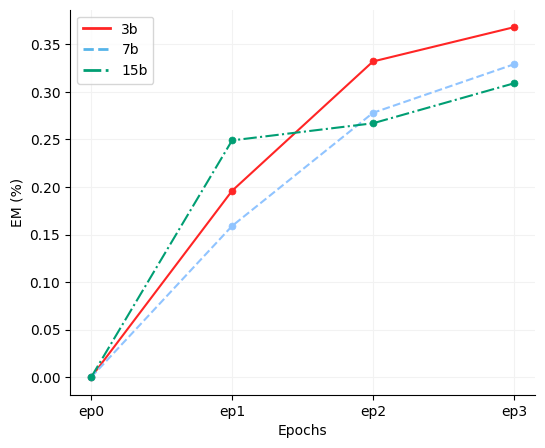

In [53]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], lw=2, label='3b', color='#FF2525', linestyle='-'),
                   Line2D([0], [0], lw=2, label='7b', color='#56B4E9', linestyle='--'),
                   Line2D([0], [0], lw=2, label='15b', color='#009E73', linestyle='-.')]


plt.rc("axes", prop_cycle=line_cycler)
fig, ax = plt.subplots(figsize=(6, 5))

# Define a nice color palette:
labels = ['3b', '7b', '15b']
#markers = ['s', 'P', 'o']
markers=['o', 'o', 'o']

for i, label in enumerate(labels):
    # Line
    ax.plot(df_ep_mem_plot.index, df_ep_mem_plot[label], label=label, marker=markers[i] , markeredgewidth=0.5, markersize=5)

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

#ax.set_title('Data extraction attack through epochs')

ax.set_xlabel('Epochs')
ax.set_ylabel('EM (%)')
plt.legend(frameon=True, handles=legend_elements)
plt.grid(axis='both', color='0.95', linestyle='-')



plt.show()
fig.savefig('./attack_mem_ep.pdf', format='pdf')

# Attack-mem-dedup

We attack the model:
- trained on 1 or 3 epochs (to be decided)
- 100 token prefix length

We vary the number of duplicates

## Read the data

In [54]:
expath = '/mem-tune/evaluation/memorization/experiments/attack_mem_dedup'

## Read the data

df_d1 = pd.read_parquet(os.path.join(expath, 'attack_mem_dedup_1.parquet'))
df_d2 = pd.read_parquet(os.path.join(expath, 'attack_mem_dedup_2.parquet'))
df_d3 = pd.read_parquet(os.path.join(expath, 'attack_mem_dedup_3.parquet'))
df_dg3 = pd.read_parquet(os.path.join(expath, 'attack_mem_dedup_g3.parquet'))

dfs = [df_d1, df_d2, df_d3, df_dg3]


## StarCoder2-3b

In [55]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
dedups = ['d1', 'd2', 'd3', 'dg3']
eps = ['ep0', 'ep3']

mean_data = {}


for metric in metrics:
    mean_data[metric] = []
    for i, dedup in enumerate(dfs):
        column_name = f'3b_{eps[1]}_{dedups[i]}_{metric}'
        mean_value = dedup[column_name].mean()
        mean_data[metric].append(mean_value)

dedup_3b_absolute = pd.DataFrame(mean_data, index=dedups)
dedup_3b_absolute

,em,bleu,meteor,rougeL
d1,0.049,42.284609,0.503858,0.472118
d2,0.237,61.513915,0.662327,0.646844
d3,0.451,75.453137,0.796118,0.785452
dg3,0.631,76.483751,0.785860,0.787725


In [56]:
# With the baseline

# compute the baselines
mean_data = {}


for metric in metrics:
    mean_data[metric] = []
    for i, dedup in enumerate(dfs):
        column_name = f'3b_{eps[0]}_{dedups[i]}_{metric}'
        mean_value = dedup[column_name].mean()
        mean_data[metric].append(mean_value)

dedup_3b_ep0 = pd.DataFrame(mean_data, index=dedups)

dedup_3b_baseline = dedup_3b_absolute.subtract(dedup_3b_ep0)

dedup_3b_baseline

,em,bleu,meteor,rougeL
d1,0.025,7.421057,0.063365,0.069896
d2,0.172,17.394880,0.155143,0.154758
d3,0.329,32.982727,0.279134,0.299710
dg3,0.368,22.640790,0.194749,0.199923


## Starcoder2-7b

In [57]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
dedups = ['d1', 'd2', 'd3', 'dg3']
eps = ['ep0', 'ep3']

mean_data = {}


for metric in metrics:
    mean_data[metric] = []
    for i, dedup in enumerate(dfs):
        column_name = f'7b_{eps[1]}_{dedups[i]}_{metric}'
        mean_value = dedup[column_name].mean()
        mean_data[metric].append(mean_value)

dedup_7b_absolute = pd.DataFrame(mean_data, index=dedups)
dedup_7b_absolute

,em,bleu,meteor,rougeL
d1,0.061,43.313255,0.514415,0.480279
d2,0.238,61.591904,0.668860,0.646918
d3,0.450,77.683073,0.814807,0.811326
dg3,0.578,74.944713,0.776174,0.777465


In [58]:
# With the baseline

# compute the baselines
mean_data = {}


for metric in metrics:
    mean_data[metric] = []
    for i, dedup in enumerate(dfs):
        column_name = f'7b_{eps[0]}_{dedups[i]}_{metric}'
        mean_value = dedup[column_name].mean()
        mean_data[metric].append(mean_value)

dedup_7b_ep0 = pd.DataFrame(mean_data, index=dedups)

dedup_7b_baseline = dedup_7b_absolute.subtract(dedup_7b_ep0)

dedup_7b_baseline

,em,bleu,meteor,rougeL
d1,0.042,8.245607,0.070022,0.071653
d2,0.181,17.399007,0.156594,0.153586
d3,0.348,33.745434,0.284511,0.314011
dg3,0.329,20.159598,0.172779,0.174168


## Starcoder2-15b

In [59]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
dedups = ['d1', 'd2', 'd3', 'dg3']
eps = ['ep0', 'ep3']

mean_data = {}


for metric in metrics:
    mean_data[metric] = []
    for i, dedup in enumerate(dfs):
        column_name = f'15b_{eps[1]}_{dedups[i]}_{metric}'
        mean_value = dedup[column_name].mean()
        mean_data[metric].append(mean_value)

dedup_15b_absolute = pd.DataFrame(mean_data, index=dedups)
dedup_15b_absolute

,em,bleu,meteor,rougeL
d1,0.075,47.571063,0.551008,0.521291
d2,0.352,69.480422,0.735116,0.722802
d3,0.544,83.215179,0.859007,0.853429
dg3,0.609,77.447960,0.801344,0.796660


In [60]:
# With the baseline

# compute the baselines
mean_data = {}


for metric in metrics:
    mean_data[metric] = []
    for i, dedup in enumerate(dfs):
        column_name = f'15b_{eps[0]}_{dedups[i]}_{metric}'
        mean_value = dedup[column_name].mean()
        mean_data[metric].append(mean_value)

dedup_15b_ep0 = pd.DataFrame(mean_data, index=dedups)

dedup_15b_baseline = dedup_15b_absolute.subtract(dedup_15b_ep0)

dedup_15b_baseline

,em,bleu,meteor,rougeL
d1,0.052,10.932447,0.090406,0.099935
d2,0.277,24.443996,0.215197,0.221894
d3,0.417,38.548428,0.324719,0.347771
dg3,0.310,19.865729,0.170740,0.171861


## Visuals

In [61]:
df_dedup_mem_plot = pd.DataFrame({'3b': dedup_3b_baseline['em'], '7b': dedup_7b_baseline['em'], '15b': dedup_15b_baseline['em']})
df_dedup_mem_plot

,3b,7b,15b
d1,0.025,0.042,0.052
d2,0.172,0.181,0.277
d3,0.329,0.348,0.417
dg3,0.368,0.329,0.310


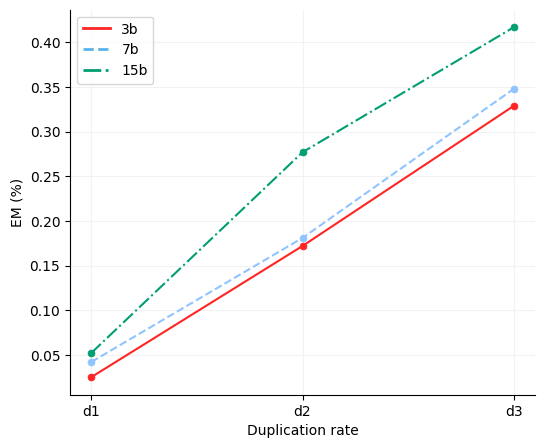

In [77]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], lw=2, label='3b', color='#FF2525', linestyle='-'),
                   Line2D([0], [0], lw=2, label='7b', color='#56B4E9', linestyle='--'),
                   Line2D([0], [0], lw=2, label='15b', color='#009E73', linestyle='-.')]
plt.rc("axes", prop_cycle=line_cycler)

fig, ax = plt.subplots(figsize=(6, 5))

# Define a nice color palette:
labels = ['3b', '7b', '15b']
#markers = ['s', 'P', 'o']
markers=['o', 'o', 'o']

for i, label in enumerate(labels):
    # Line
    ax.plot(df_dedup_mem_plot.loc[['d1', 'd2', 'd3']].index, df_dedup_mem_plot.loc[['d1', 'd2', 'd3']][label], label=label, marker=markers[i], markeredgewidth=0.5, markersize=5)

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
#ax.yaxis.set_ticks_position("left")
#ax.xaxis.set_ticks_position("bottom")

#ax.set_title('Data extraction attack through epochs')
ax.set_xlabel('Duplication rate')
ax.set_ylabel('EM (%)')
plt.legend(frameon=True, handles=legend_elements)
plt.grid(axis='both', color='0.95', linestyle='-')

plt.show()
fig.savefig('attack_mem_dedup.pdf', format='pdf')

# Attack-mem-plen

We attack the model:
- trained on 3 epochs
- dedup rate >3

We vary the prefix length

## Read the data

In [65]:
expath = '/mem-tune/evaluation/memorization/experiments/attack_mem_plen'
df = pd.read_parquet(os.path.join(expath, 'attack_mem_plen.parquet'))

## StarCoder2-3b

In [66]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
plens = ['p100', 'p150', 'p200', 'p250']
eps = ['ep0', 'ep3']

mean_data = {}

for metric in metrics:
    mean_data[metric] = []
    for plen in plens:
        column_name = f'3b_{eps[1]}_{plen}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

plen_3b_absolute = pd.DataFrame(mean_data, index=plens)
plen_3b_absolute

,em,bleu,meteor,rougeL
p100,0.631,76.484203,0.785879,0.787761
p150,0.689,78.540083,0.805499,0.808483
p200,0.747,81.670403,0.838851,0.829236
p250,0.815,86.521473,0.877468,0.870055


In [67]:
# With the baseline

# compute the baselines
mean_data = {}

for metric in metrics:
    mean_data[metric] = []
    for plen in plens:
        column_name = f'3b_{eps[0]}_{plen}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

plen_3b_ep0 = pd.DataFrame(mean_data, index=plens)
plen_3b_baseline = plen_3b_absolute.subtract(plen_3b_ep0)
plen_3b_baseline

,em,bleu,meteor,rougeL
p100,0.367,22.587437,0.194358,0.199383
p150,0.393,23.125901,0.196023,0.203444
p200,0.443,25.934095,0.220643,0.216824
p250,0.502,29.707475,0.236444,0.239092


## StarCoder2-7b

In [68]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
plens = ['p100', 'p150', 'p200', 'p250']
eps = ['ep0', 'ep3']

mean_data = {}

for metric in metrics:
    mean_data[metric] = []
    for plen in plens:
        column_name = f'7b_{eps[1]}_{plen}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

plen_7b_absolute = pd.DataFrame(mean_data, index=plens)
plen_7b_absolute

,em,bleu,meteor,rougeL
p100,0.578,74.995617,0.776693,0.778011
p150,0.646,77.325951,0.803730,0.798020
p200,0.712,80.200689,0.824692,0.818369
p250,0.800,84.977597,0.856810,0.856821


In [69]:
# With the baseline

# compute the baselines
mean_data = {}

for metric in metrics:
    mean_data[metric] = []
    for plen in plens:
        column_name = f'7b_{eps[0]}_{plen}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

plen_7b_ep0 = pd.DataFrame(mean_data, index=plens)
plen_7b_baseline = plen_7b_absolute.subtract(plen_7b_ep0)
plen_7b_baseline

,em,bleu,meteor,rougeL
p100,0.329,20.213281,0.173191,0.174857
p150,0.386,22.014599,0.189702,0.189405
p200,0.436,24.376340,0.200292,0.201516
p250,0.492,24.566231,0.179857,0.189914


## StarCoder2-15b

In [70]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
plens = ['p100', 'p150', 'p200', 'p250']
eps = ['ep0', 'ep3']

mean_data = {}

for metric in metrics:
    mean_data[metric] = []
    for plen in plens:
        column_name = f'15b_{eps[1]}_{plen}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

plen_15b_absolute = pd.DataFrame(mean_data, index=plens)
plen_15b_absolute

,em,bleu,meteor,rougeL
p100,0.609,77.449415,0.801306,0.796559
p150,0.729,80.566627,0.854995,0.825766
p200,0.817,82.902077,0.878727,0.843539
p250,0.888,86.814412,0.912949,0.876072


In [71]:
# With the baseline

# compute the baselines
mean_data = {}

for metric in metrics:
    mean_data[metric] = []
    for plen in plens:
        column_name = f'15b_{eps[0]}_{plen}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

plen_15b_ep0 = pd.DataFrame(mean_data, index=plens)
plen_15b_baseline = plen_15b_absolute.subtract(plen_15b_ep0)
plen_15b_baseline

,em,bleu,meteor,rougeL
p100,0.310,19.874890,0.170796,0.171847
p150,0.372,21.684561,0.204705,0.191712
p200,0.441,23.207238,0.209227,0.198899
p250,0.474,24.393655,0.202508,0.200509


## Visuals

In [72]:
df_plen_mem_plot = pd.DataFrame({'3b': plen_3b_baseline['em'], '7b': plen_7b_baseline['em'], '15b': plen_15b_baseline['em']})
df_plen_mem_plot

,3b,7b,15b
p100,0.367,0.329,0.310
p150,0.393,0.386,0.372
p200,0.443,0.436,0.441
p250,0.502,0.492,0.474


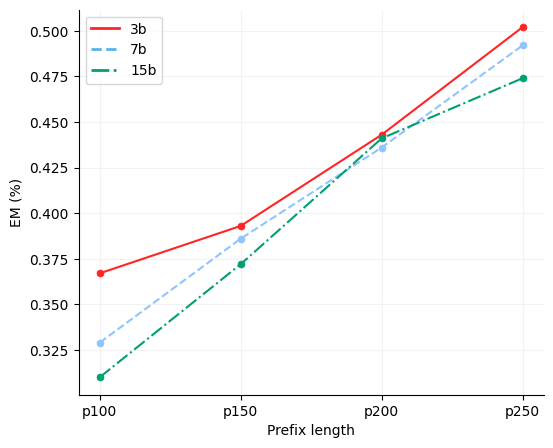

In [78]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], lw=2, label='3b', color='#FF2525', linestyle='-'),
                   Line2D([0], [0], lw=2, label='7b', color='#56B4E9', linestyle='--'),
                   Line2D([0], [0], lw=2, label='15b', color='#009E73', linestyle='-.')]

fig, ax = plt.subplots(figsize=(6, 5))

# Define a nice color palette:
labels = ['3b', '7b', '15b']
#markers = ['s', 'P', 'o']
markers=['o', 'o', 'o']

for i, label in enumerate(labels):
    # Line
    ax.plot(df_plen_mem_plot.index, df_plen_mem_plot[label], label=label, marker=markers[i], markeredgewidth=0.5, markersize=5)

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
#ax.yaxis.set_ticks_position("left")
#ax.xaxis.set_ticks_position("bottom")

#ax.set_title('Data extraction attack through epochs')
ax.set_xlabel('Prefix length')
ax.set_ylabel('EM (%)')
plt.legend(frameon=True, handles=legend_elements)
plt.grid(axis='both', color='0.95', linestyle='-')



plt.show()
fig.savefig('attack_mem_plen.pdf', format='pdf')